In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../../../")
%load_ext autoreload
%autoreload 2
from polire.interpolate import Kriging

In [3]:
df = pd.read_csv("../dataset/pm.csv")

In [4]:
df.head()

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/11/1990,AQS,120111003,1,45,ug/m3 SC,42,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379
1,01/17/1990,AQS,120111003,1,21,ug/m3 SC,19,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379
2,01/23/1990,AQS,120111003,1,26,ug/m3 SC,24,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379
3,01/29/1990,AQS,120111003,1,26,ug/m3 SC,24,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379
4,02/04/1990,AQS,120111003,1,19,ug/m3 SC,18,NaN,1,100.0,81102,PM10 Total 0-10um STP,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",12,Florida,11,Broward,26.129531,-80.168379


In [5]:
df.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration',
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE'],
      dtype='object')

In [6]:
tdf = df.drop(columns=[ 'Source', 
       'UNITS', 'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT',
        'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'STATE_CODE', 'CBSA_CODE','CBSA_NAME', 'POC'
                ])

In [7]:
tdf['Site ID'].unique().shape

(1347,)

## REMOVE UNUSED STATES

In [8]:
tdf = tdf[tdf['STATE']!='Hawaii']
tdf = tdf[tdf['STATE']!='Alaska']

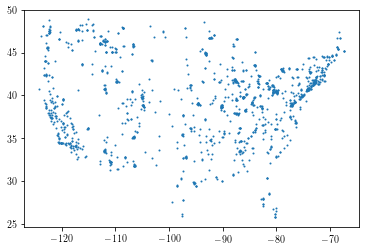

In [9]:
plt.scatter(tdf['SITE_LONGITUDE'].unique(), tdf['SITE_LATITUDE'].unique(), s = 1)
plt.show()

In [10]:
tdf[tdf['STATE']=='North Dakota'].shape

(360, 9)

In [11]:
t1 = pd.concat([tdf[tdf['SITE_LONGITUDE']<-104.01], tdf[tdf['SITE_LONGITUDE']>-99.42]])

In [12]:
t1 = t1[t1['STATE']!='New Mexico']
t1 = t1[t1['STATE']!='Arizona']

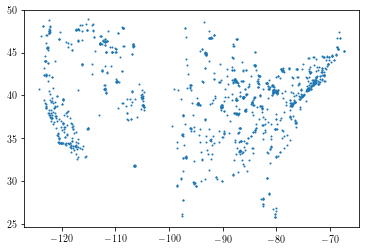

In [13]:
plt.scatter(t1['SITE_LONGITUDE'].unique(), t1['SITE_LATITUDE'].unique(), s = 1)
plt.show()

# removed missippi

In [14]:
states = t1['STATE'].unique()
nw = ['Washington', 'Oregon', 'Wyoming','Idaho', 'Montana', 'Colorado','Utah','Nevada']
sc = ['California']
mw = ['West Virginia', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
se = ['Oklahoma','Florida', 'Alabama', 'Georgia',  'Tennessee', 'South Carolina', 'North Carolina', 'Virginia', 'Louisiana', 'Arkansas', 'Texas', 'Kentucky']
ne = ['Connecticut',
 'Delaware',
 'Maine',
 'Maryland',
 'Massachusetts',
 'New Hampshire',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Rhode Island',
 'Vermont','District Of Columbia'
]


In [15]:
nwdf = t1[np.isin(t1['STATE'], nw)]
mwdf = t1[np.isin(t1['STATE'], mw)]
sedf = t1[np.isin(t1['STATE'], se)]
nedf = t1[np.isin(t1['STATE'], ne)]
cal = t1[np.isin(t1['STATE'], ['California'])]
ncal = cal[cal['SITE_LATITUDE']>=34.81]
scal = cal[cal['SITE_LATITUDE']<34.81]
nwdf = pd.concat([nwdf, ncal])

## 5 Regions under consideration
1. Northwest = [Washington, Oregon and Wyoming along with Idaho, Montana]
2. South California = Everything in California at latitude less than 35.70
3. Midwest = [ Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, and Wisconsin]
4. Southeast = [Florida, Alabama, Georgia, Mississippi, Tennessee, South Carolina, North Carolina, Virginia, Louisiana, Arkansas, and Texas. Kentucky, Maryland]
5. Northeast = 


## VALIDATION OF THE DATA BEFORE USAGE

In [16]:
def func_select_11(df):
    t = df.groupby(['Date', 'Site ID', 'STATE', 'COUNTY_CODE','COUNTY']).mean()
    t = t.reset_index(None)
    t1 = t.groupby('Site ID').count()
    t11 = t.set_index(['Site ID'])
    t11 = t11[t1['Date']>11]
    t11 = t11.reset_index(None)
    return t11

* Industrial Midwest Annual
* Northeast Q2
* Northwest Q1
* Southern California Annual
* Southeast Q3

    if str1=='Industrial Midwest' or str1=='Northeast' or str1=='Southeast':
        nlags = 40
    else:
        nlags = 17


PM10- VALUES MEAN =  29.567450442142068


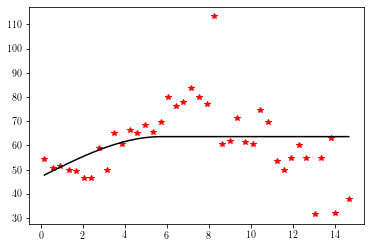

PM10- VALUES MEAN =  23.18392861890126


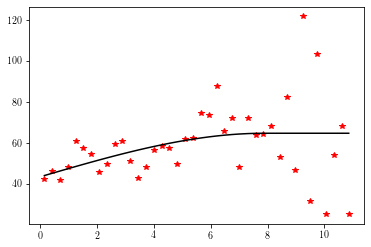

Q1
PM10- VALUES MEAN =  32.04300716806007


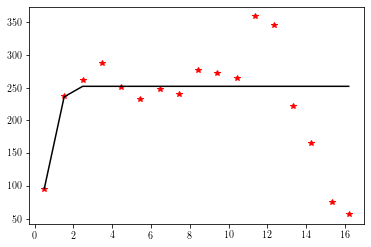

PM10- VALUES MEAN =  39.19482940832278


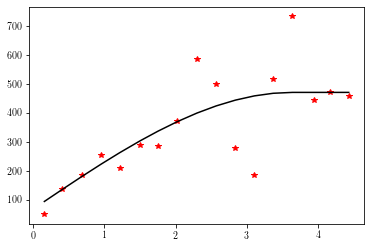

PM10- VALUES MEAN =  36.7580826019596


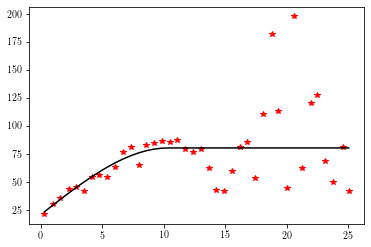

Kriging

In [17]:
# Industrial Midwest Annual
nlags = 40
annual_scal = mwdf.groupby('Site ID').mean()
annual_scal.drop(columns = ['COUNTY_CODE', 'PERCENT_COMPLETE'], inplace=True)
X = annual_scal[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = annual_scal[['Daily Mean PM10 Concentration']]
print("PM10- VALUES MEAN = ", y.values.mean())
X[:, 0] = X[:, 0] + 360
k1 = Kriging(plotting=True, variogram_model='spherical', coordinate_type='Geographic', nlags=nlags)
k1.fit(X, y)

# Northeast Q2
nlags = 40
neq2 = nedf[(nedf['Date']>='04/01/1990').values & (nedf['Date']<='06/30/1990').values]
valid_scal_2 =  func_select_11(neq2)
valid_scal_2 = valid_scal_2.groupby('Site ID').mean()
valid_scal_2.drop(columns = ['COUNTY_CODE', 'PERCENT_COMPLETE'], inplace=True)
X = valid_scal_2[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = valid_scal_2[['Daily Mean PM10 Concentration']]
X[:, 0] = X[:, 0] + 360
print("PM10- VALUES MEAN = ", y.values.mean())
k2 = Kriging(plotting=True, variogram_model='spherical', coordinate_type='Geographic', nlags=nlags)
k2.fit(X, y)

# Northwest Q1
nlags = 17
nwq1 = nwdf[nwdf['Date']<='03/31/1990']
valid_scal_1 =  func_select_11(nwq1)
valid_scal_1 = valid_scal_1.groupby('Site ID').mean()
valid_scal_1.drop(columns = ['COUNTY_CODE', 'PERCENT_COMPLETE'], inplace=True)
X = valid_scal_1[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = valid_scal_1[['Daily Mean PM10 Concentration']]
X[:, 0] = X[:, 0] + 360
print("Q1")
print("PM10- VALUES MEAN = ", y.values.mean())
k3 = Kriging(plotting=True, variogram_model='spherical', coordinate_type='Geographic', nlags=nlags)
k3.fit(X, y)

# Southern California Annual
nlags = 17
annual_scal = scal.groupby('Site ID').mean()
annual_scal.drop(columns = ['COUNTY_CODE', 'PERCENT_COMPLETE'], inplace=True)
X = annual_scal[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = annual_scal[['Daily Mean PM10 Concentration']]
print("PM10- VALUES MEAN = ", y.values.mean())
X[:, 0] = X[:, 0] + 360
k4 = Kriging(plotting=True, variogram_model='spherical', coordinate_type='Geographic', nlags=nlags)
k4.fit(X, y)

# Southeast Q3
nlags = 40
seq3 = sedf[(sedf['Date']>='07/01/1990').values & (sedf['Date']<='09/30/1990').values]
valid_scal_3 =  func_select_11(seq3)
valid_scal_3 = valid_scal_3.groupby('Site ID').mean()
valid_scal_3.drop(columns = ['COUNTY_CODE', 'PERCENT_COMPLETE'], inplace=True)
X = valid_scal_3[['SITE_LONGITUDE', 'SITE_LATITUDE']].values
y = valid_scal_3[['Daily Mean PM10 Concentration']]
print("PM10- VALUES MEAN = ", y.values.mean())
X[:, 0] = X[:, 0] + 360
k5 = Kriging(plotting=True, variogram_model='spherical', coordinate_type='Geographic', nlags=nlags)
k5.fit(X, y)


### Plotting


if str1=='Industrial Midwest' or str1=='Northeast' or str1=='Southeast':
    nlags = 40
else:
    nlags = 17

if str1 == "Northwest":
    xlim = (-10, 1010)
    ylim = None
if str1 == "Southern California":
    xlim = (-10, 410)
    ylim = None
if str1 == "Industrial Midwest":
    xlim = (-10, 1010)
    ylim = None
if str1 == "Northeast":
    xlim = (-10, 1010)
    ylim = None
if str1 == "Southeast":
#         pass
    xlim = (-10, 1010)
    ylim = (-10, 110)


In [18]:
from matplotlib import gridspec

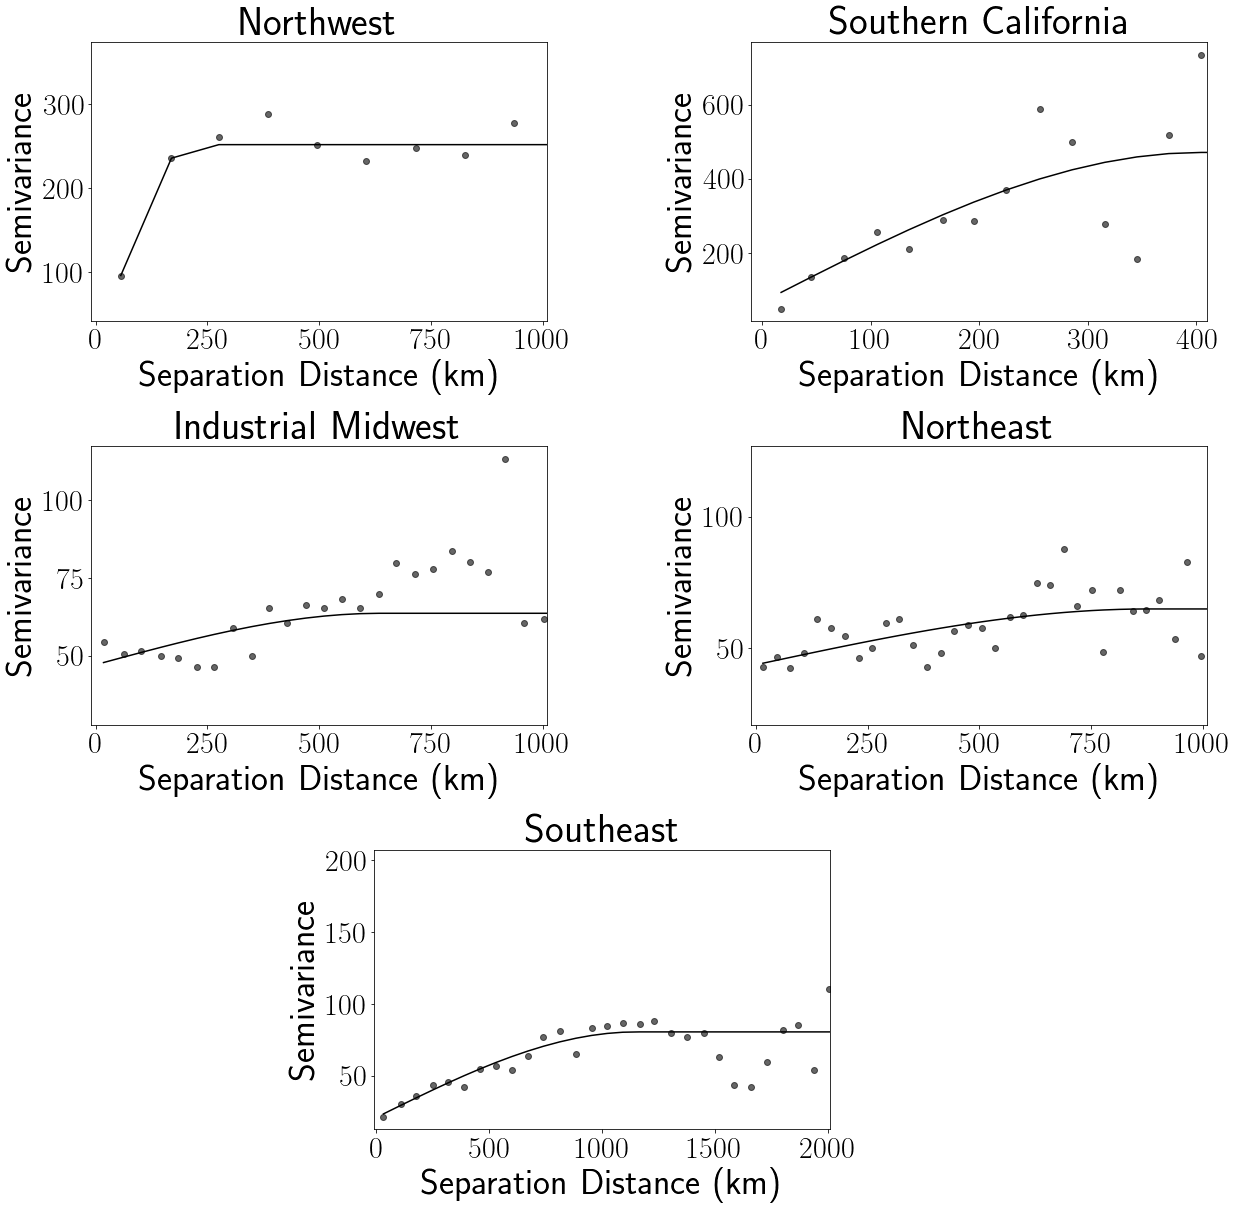

In [19]:
gs = gridspec.GridSpec(19, 12)

# I
title = "Northwest"
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(gs[:5, :5] )
ax.scatter(k3.ok.lags * np.pi / 180 * 6371, k3.ok.semivariance, color='black', alpha=0.6)
ax.plot(
    k3.ok.lags * np.pi / 180 * 6371,
    k3.ok.variogram_function(k3.ok.variogram_model_parameters, k3.ok.lags),
    "k-",
)
ax.set_xlabel("Separation Distance (km)", fontsize=36)
ax.set_ylabel("Semivariance", fontsize=36)
ax.set_title(title, fontsize=40)
ax.set_xlim(-10, 1010)
ax.tick_params(axis='both', labelsize=30)

ax.set_ylim(None)

title = "Southern California"
ax1 = plt.subplot(gs[:5, 7:] )
ax1.scatter(k4.ok.lags * np.pi / 180 * 6371, k4.ok.semivariance, color='black', alpha=0.6)
ax1.plot(
    k4.ok.lags * np.pi / 180 * 6371,
    k4.ok.variogram_function(k4.ok.variogram_model_parameters, k4.ok.lags),
    "k-",
)
ax1.set_xlabel("Separation Distance (km)", fontsize=36)
ax1.set_ylabel("Semivariance", fontsize=36)
ax1.set_title(title, fontsize=40)
ax1.set_xlim(-10, 410)
ax1.set_ylim(None)
ax1.tick_params(axis='both', labelsize=30)


title = "Industrial Midwest"
ax2 = plt.subplot(gs[7:12, :5] )
ax2.scatter(k1.ok.lags * np.pi / 180 * 6371, k1.ok.semivariance, color='black', alpha=0.6)
ax2.plot(
    k1.ok.lags * np.pi / 180 * 6371,
    k1.ok.variogram_function(k1.ok.variogram_model_parameters, k1.ok.lags),
    "k-",
)
ax2.set_xlabel("Separation Distance (km)", fontsize=36)
ax2.set_ylabel("Semivariance", fontsize=36)
ax2.set_title(title, fontsize=40)
ax2.set_xlim(-10, 1010)
ax2.set_ylim(None)
ax2.tick_params(axis='both', labelsize=30)


title = "Northeast"
ax3 = plt.subplot(gs[7:12, 7:] )
ax3.scatter(k2.ok.lags * np.pi / 180 * 6371, k2.ok.semivariance, color='black', alpha=0.6)
ax3.plot(
    k2.ok.lags * np.pi / 180 * 6371,
    k2.ok.variogram_function(k2.ok.variogram_model_parameters, k2.ok.lags),
    "k-",
)
ax3.set_xlabel("Separation Distance (km)", fontsize=36)
ax3.set_ylabel("Semivariance", fontsize=36)
ax3.set_title(title, fontsize=40)
ax3.set_xlim(-10, 1010)
ax3.set_ylim(None)
ax3.tick_params(axis='both', labelsize=30)


title = "Southeast"
ax4 = plt.subplot(gs[14:, 3:8] )
ax4.scatter(k5.ok.lags * np.pi / 180 * 6371, k5.ok.semivariance, color='black', alpha=0.6)
ax4.plot(
    k5.ok.lags * np.pi / 180 * 6371,
    k5.ok.variogram_function(k5.ok.variogram_model_parameters, k5.ok.lags),
    "k-",
)
ax4.set_xlabel("Separation Distance (km)", fontsize=36)
ax4.set_ylabel("Semivariance", fontsize=36)
ax4.set_title(title, fontsize=40)
ax4.set_xlim(-10, 2010)
ax4.set_ylim(None)
ax4.tick_params(axis='both', labelsize=30)


